In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset-stroke-data/healthcare-dataset-stroke-data.csv


In [6]:
data = pd.read_csv("../input/healthcare-dataset-stroke-data/healthcare-dataset-stroke-data.csv")
display(data.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
data = data.drop(columns = ["id"])

In [8]:
# Veri türlerini ve sütun bilgilerini al
print("\nVeri seti bilgisi:")
print(data.info())


Veri seti bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


In [9]:
# Eksik değer kontrolü
print("\nEksik değer sayısı:")
print(data.isnull().sum())


Eksik değer sayısı:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [17]:
# Sayısal sütunların temel istatistikleri
print("\nTemel istatistikler:")
data.describe()


Temel istatistikler:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
# Eksik veri kontrol
print(data.isnull().sum())


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [11]:
# Her sütundaki eksik değer oranını hesapla
missing_ratio = data.isnull().sum() / len(data) * 100

# Sonuçları yazdır
print("Eksik Veri Oranları (%):")
print(missing_ratio)


Eksik Veri Oranları (%):
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [12]:
# Kategorik ve sayısal sütunları ayır
categorical_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("\nKategorik sütunlar:")
print(categorical_columns)

print("\nSayısal sütunlar:")
print(numeric_columns)



Kategorik sütunlar:
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

Sayısal sütunlar:
Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


In [13]:
import warnings
warnings.filterwarnings("ignore")
# Sadece numerik sütunları seç
numeric_columns = data.select_dtypes(include=['number']).columns

# Her sütundaki eksik değerleri medyan ile doldur
for col in numeric_columns:
    median_value = data[col].mean()  # Medyan değerini al
    data[col].fillna(median_value, inplace=True)

# Sonucu yazdır
print("Eksik veriler dolduruldu:")
print(data)

Eksik veriler dolduruldu:
      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_

In [14]:
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


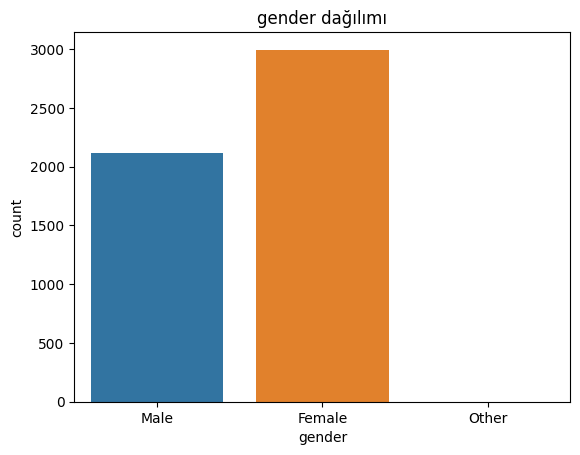

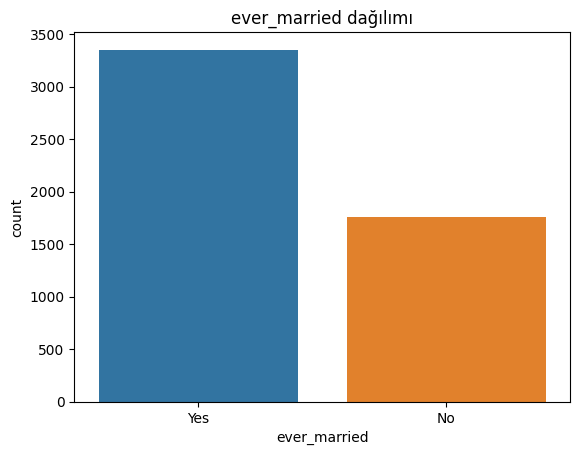

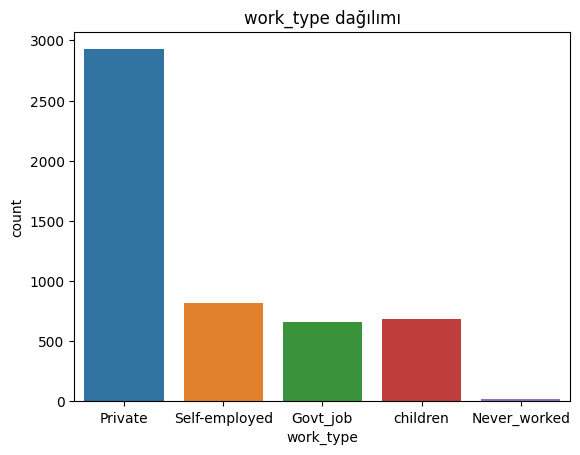

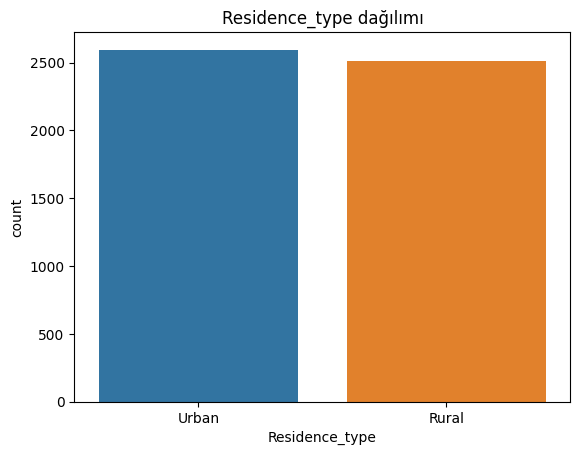

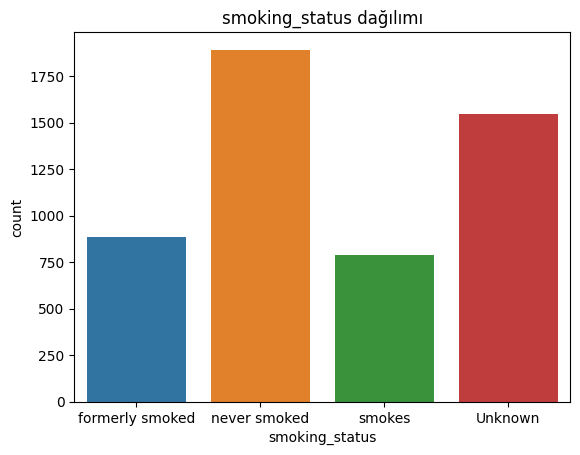

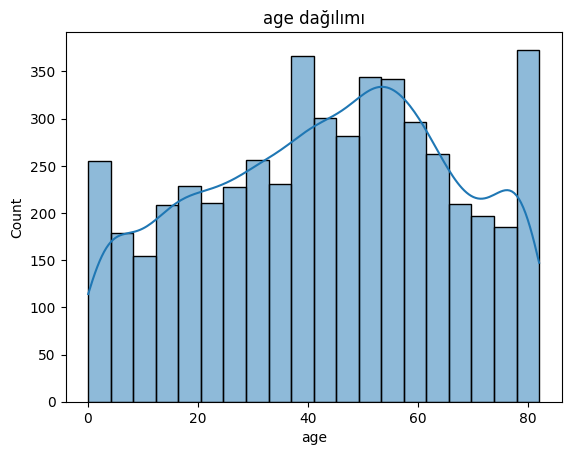

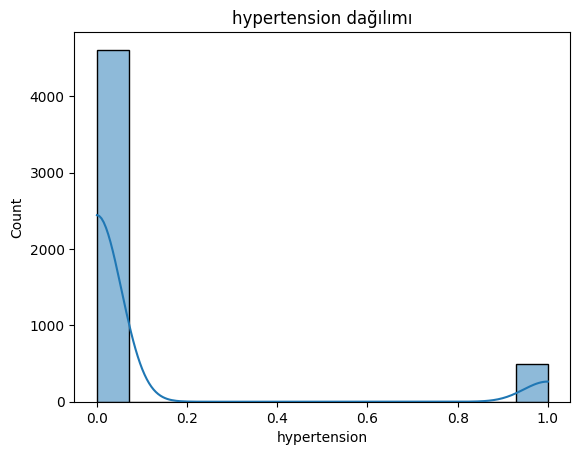

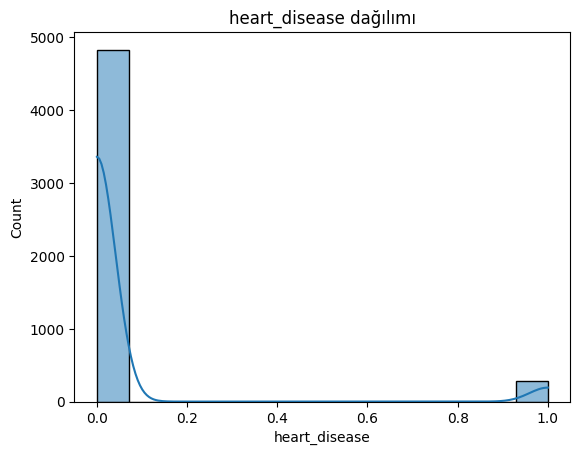

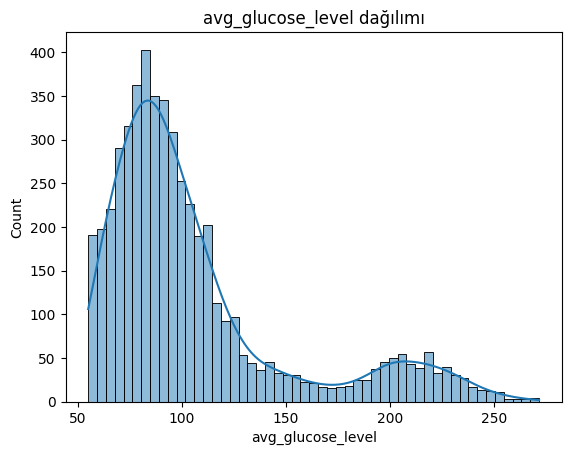

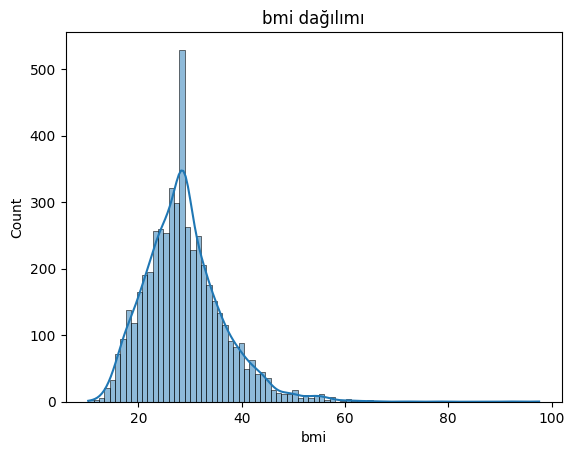

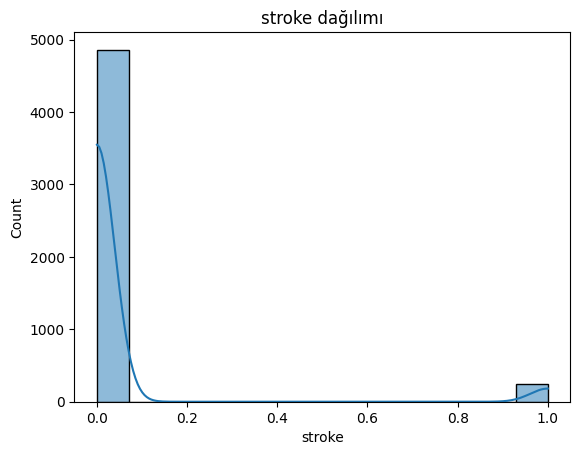

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorik sütunların dağılımı
for col in categorical_columns:
    sns.countplot(data=data, x=col)
    plt.title(f"{col} dağılımı")
    plt.show()

# Sayısal sütunların histogramları
for col in numeric_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f"{col} dağılımı")
    plt.show()


In [19]:
# pc sütunundaki kategorilerin sayısını al
gender_counts = data['gender'].value_counts()

# Kategorilerin oranlarını hesapla
gender_percentage = (gender_counts / len(data)) * 100

# Sonuçları yazdır
print("pc sütunundaki kategorilerin sayıları ve oranları:")
print(gender_counts)
print("\npc sütunundaki kategorilerin oranları:")
print(gender_percentage)

pc sütunundaki kategorilerin sayıları ve oranları:
gender
Female    2983
Male      2104
Other        1
Name: count, dtype: int64

pc sütunundaki kategorilerin oranları:
gender
Female    58.628145
Male      41.352201
Other      0.019654
Name: count, dtype: float64


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [20]:
# pc sütunundaki kategorilerin sayısını al
work_type_counts = data['stroke'].value_counts()

# Kategorilerin oranlarını hesapla
work_type_percentage = (work_type_counts / len(data)) * 100

# Sonuçları yazdır
print("pc sütunundaki kategorilerin sayıları ve oranları:")
print(work_type_counts)
print("\npc sütunundaki kategorilerin oranları:")
print(work_type_percentage)

pc sütunundaki kategorilerin sayıları ve oranları:
stroke
0    4839
1     249
Name: count, dtype: int64

pc sütunundaki kategorilerin oranları:
stroke
0    95.106132
1     4.893868
Name: count, dtype: float64


In [21]:
# 'Other' değerine sahip satırı sil
data = data[data['gender'] != 'Other']

# İşlem sonrası 'gender' sütunundaki değerlerin dağılımını kontrol et
print("\nGüncellenmiş gender sütunu dağılımı:")
print(data['gender'].value_counts())



Güncellenmiş gender sütunu dağılımı:
gender
Female    2983
Male      2104
Name: count, dtype: int64


In [22]:
# 'Other' değerine sahip satırı sil
data = data[data['work_type'] != 'Never_worked']

# İşlem sonrası 'gender' sütunundaki değerlerin dağılımını kontrol et
print("\nGüncellenmiş work_type sütunu dağılımı:")
print(data['work_type'].value_counts())



Güncellenmiş work_type sütunu dağılımı:
work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Name: count, dtype: int64


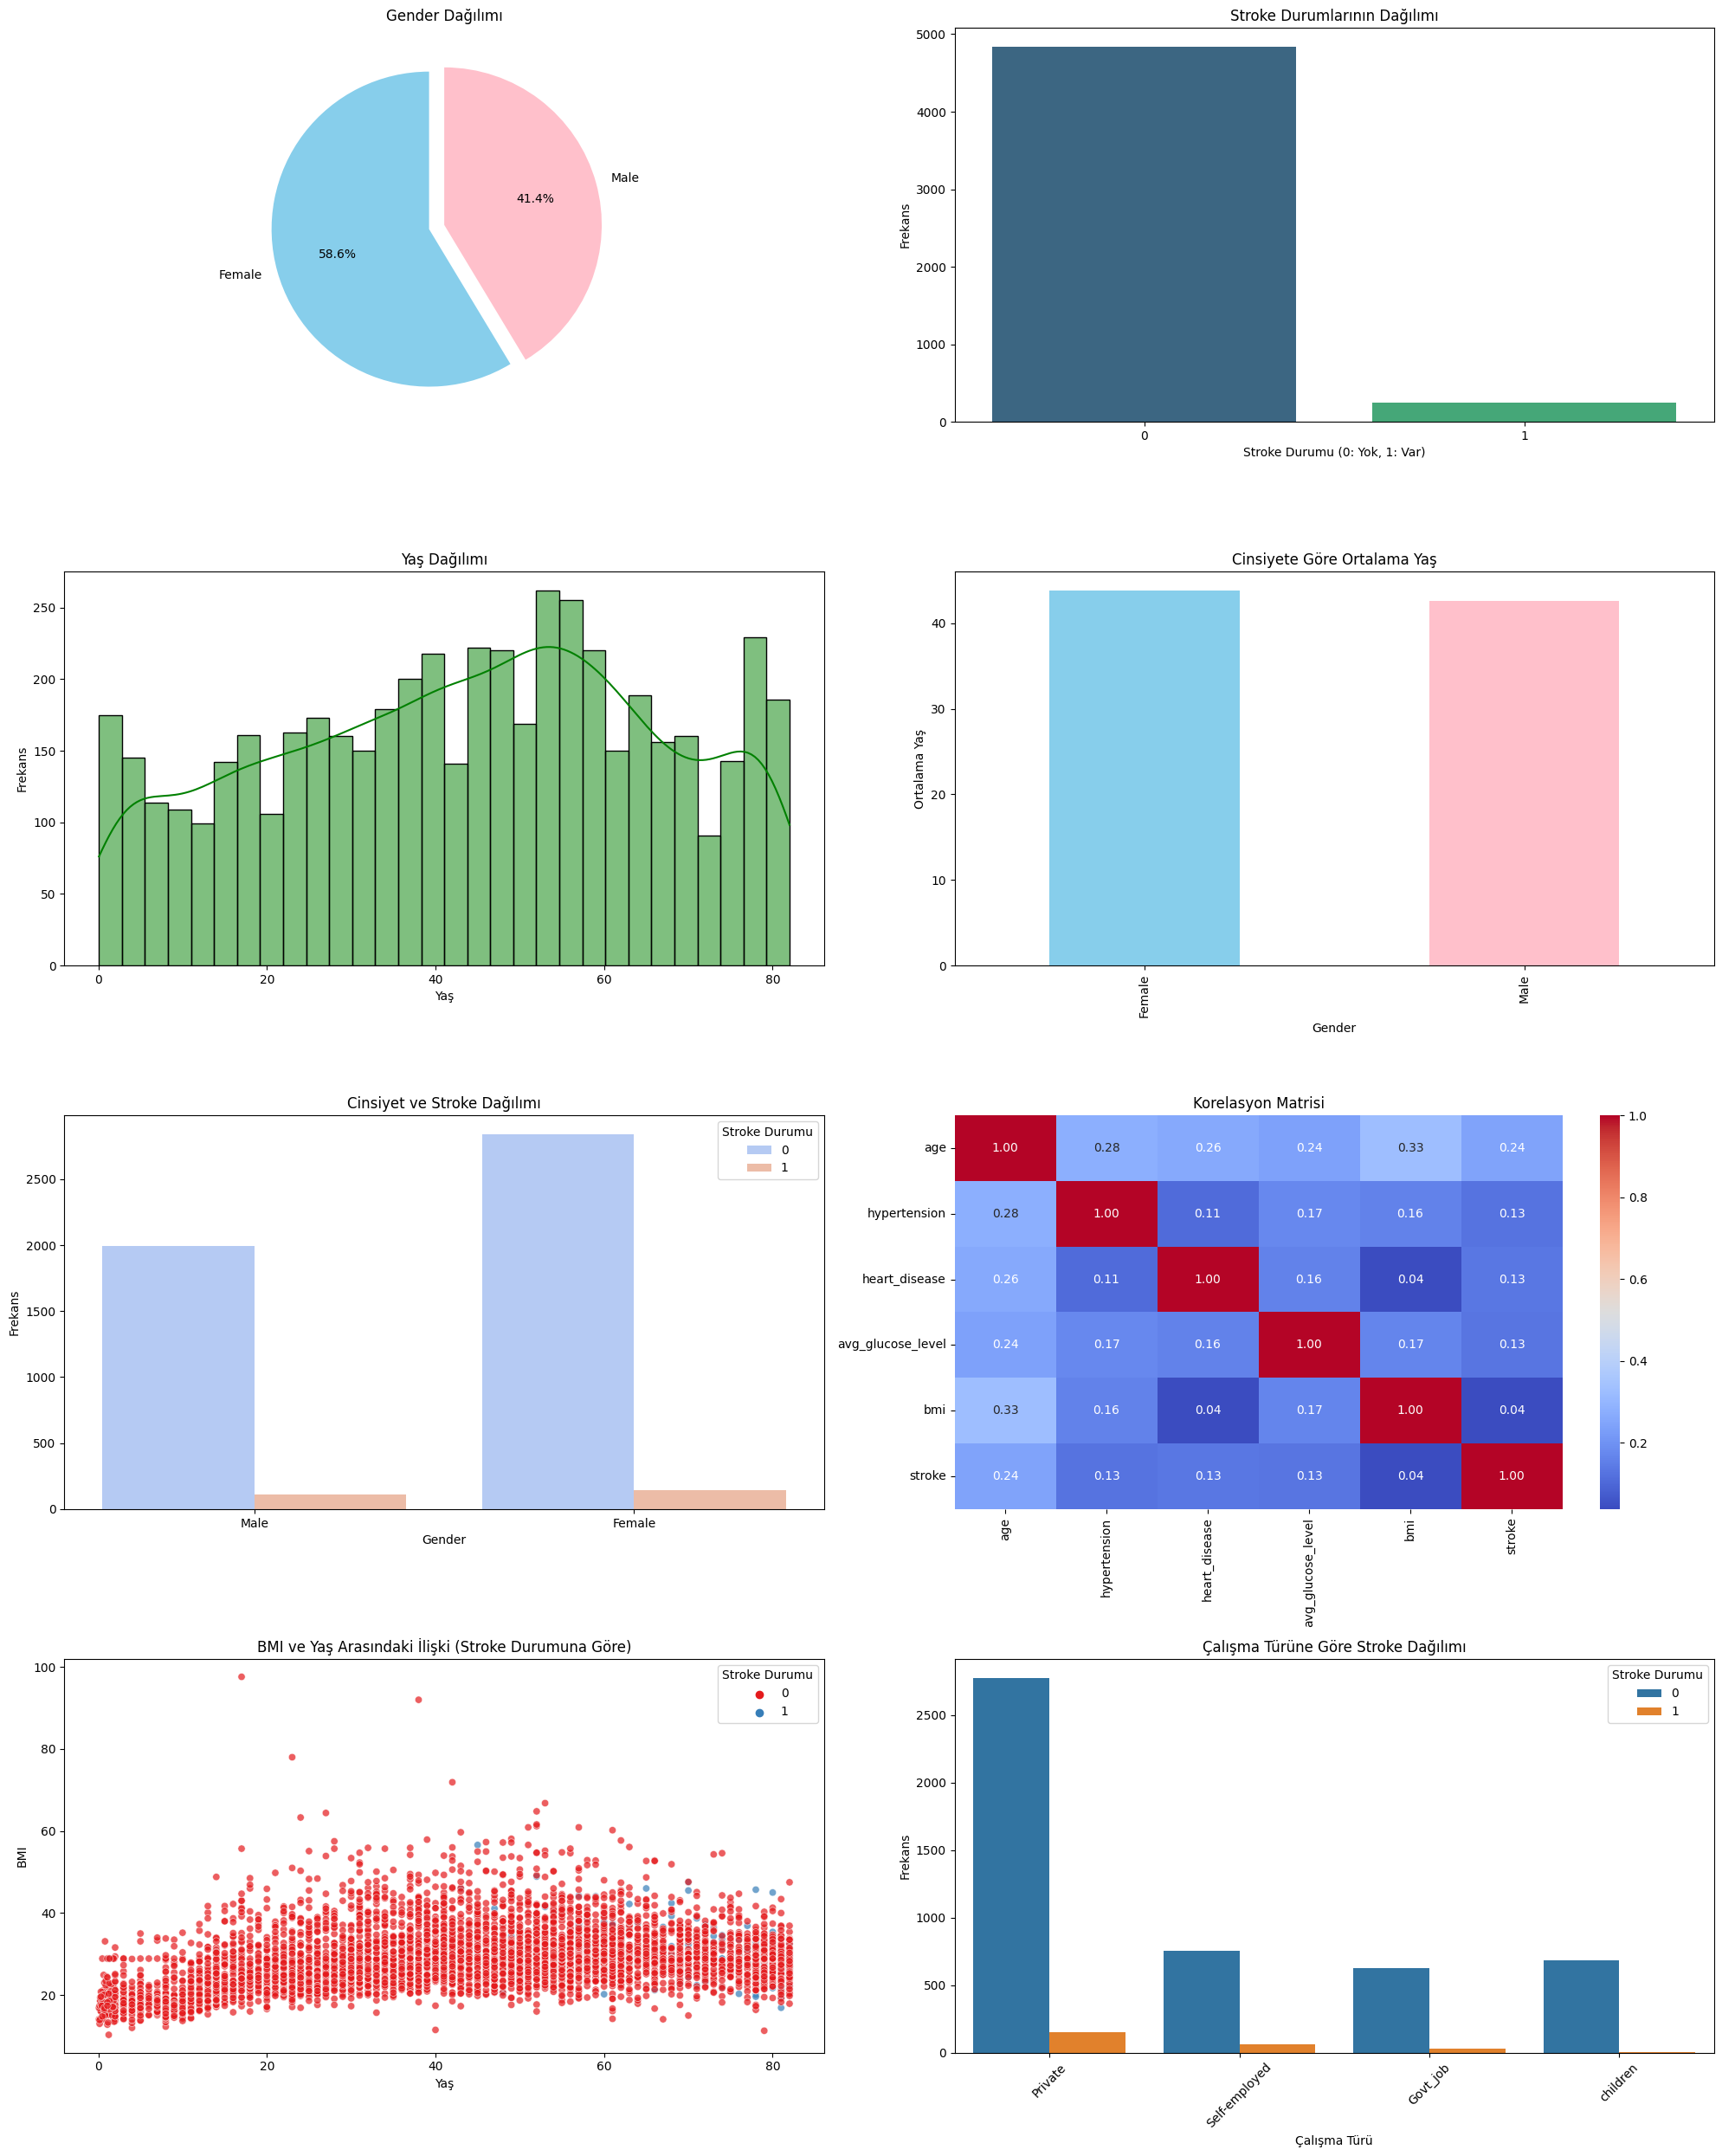

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yeni bir figür oluştur ve eksenleri düzenle
fig, axes = plt.subplots(4, 2, figsize=(20, 25))  # 4x2 düzenleme (8 grafik)

# Pasta grafiği: Gender Dağılımı
data['gender'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'], explode=[0.1, 0], ax=axes[0, 0]
)
axes[0, 0].set_title('Gender Dağılımı')
axes[0, 0].set_ylabel('')

# Çubuk grafiği: Stroke Durumlarının Dağılımı
sns.countplot(data=data, x='stroke', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Stroke Durumlarının Dağılımı')
axes[0, 1].set_xlabel('Stroke Durumu (0: Yok, 1: Var)')
axes[0, 1].set_ylabel('Frekans')

# Histogram: Yaş Dağılımı
sns.histplot(data['age'], kde=True, color='green', bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Yaş Dağılımı')
axes[1, 0].set_xlabel('Yaş')
axes[1, 0].set_ylabel('Frekans')

# Bar grafiği: Cinsiyete Göre Ortalama Yaş
gender_age = data.groupby('gender')['age'].mean()
gender_age.plot(kind='bar', color=['skyblue', 'pink'], ax=axes[1, 1])
axes[1, 1].set_title('Cinsiyete Göre Ortalama Yaş')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Ortalama Yaş')

# Çubuk grafiği: Cinsiyet ve Stroke Dağılımı
sns.countplot(data=data, x='gender', hue='stroke', palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('Cinsiyet ve Stroke Dağılımı')
axes[2, 0].set_xlabel('Gender')
axes[2, 0].set_ylabel('Frekans')
axes[2, 0].legend(title='Stroke Durumu')

# Isı haritası: Korelasyon Matrisi
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2, 1])
axes[2, 1].set_title('Korelasyon Matrisi')

# Scatter plot: BMI ve Yaş Arasındaki İlişki
sns.scatterplot(data=data, x='age', y='bmi', hue='stroke', palette='Set1', alpha=0.7, ax=axes[3, 0])
axes[3, 0].set_title('BMI ve Yaş Arasındaki İlişki (Stroke Durumuna Göre)')
axes[3, 0].set_xlabel('Yaş')
axes[3, 0].set_ylabel('BMI')
axes[3, 0].legend(title='Stroke Durumu')

# Çubuk grafiği: Çalışma Türüne Göre Stroke Dağılımı
sns.countplot(data=data, x='work_type', hue='stroke', palette='tab10', ax=axes[3, 1])
axes[3, 1].set_title('Çalışma Türüne Göre Stroke Dağılımı')
axes[3, 1].set_xlabel('Çalışma Türü')
axes[3, 1].set_ylabel('Frekans')
axes[3, 1].set_xticklabels(axes[3, 1].get_xticklabels(), rotation=45)
axes[3, 1].legend(title='Stroke Durumu')

# Genel düzenleme
plt.tight_layout()
plt.show()


In [30]:
from sklearn.preprocessing import LabelEncoder

# Sadece `object` tipindeki sütunları seç
object_columns = data.select_dtypes(include=['object']).columns

# Label Encoding uygulamak
label_encoders = {}  # Her sütun için LabelEncoder'ı saklamak için bir sözlük
for col in object_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Label Encoding işlemi
    label_encoders[col] = le  # LabelEncoder'ı sakla

# Sonucu yazdır
print("Label Encoding uygulanmış veri seti:")
print(data)

Label Encoding uygulanmış veri seti:
      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          0  61.0             0              0             1          2   
2          1  80.0             0              1             1          1   
3          0  49.0             0              0             1          1   
4          0  79.0             1              0             1          2   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          1   
5106       0  81.0             0              0             1          2   
5107       0  35.0             0              0             1          2   
5108       1  51.0             0              0             1          1   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi

In [31]:
independent_col = [col for col in data.columns if col != "stroke"] # X
dependent_col= "stroke" # y

In [32]:
X = data[independent_col]
y = data[dependent_col]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_acc = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

print("Confusion matrix: \n",cm)
print("classification_report: \n",cr)



Confusion matrix: 
 [[1375   62]
 [  75   15]]
classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1437
           1       0.19      0.17      0.18        90

    accuracy                           0.91      1527
   macro avg       0.57      0.56      0.57      1527
weighted avg       0.90      0.91      0.91      1527



**Veri Artırma İşleminden Sonra**

In [43]:
# stroke sütunundaki kategorilerin sayısını al
stroke_counts = data['stroke'].value_counts()

# 1 kategorisinin sayısının %50'sini al
additional_zeros = int(stroke_counts[0] * 0.5)

# 0 kategorisinin sayısını arttır
zeros_to_add = data[data['stroke'] == 1].sample(n=additional_zeros, replace=True, random_state=42)

# Yeni 0'ları mevcut veri setine ekle
new_df = pd.concat([data, zeros_to_add], axis=0, ignore_index=True)

# Yeni pc kategorilerinin sayısını kontrol et
new_stroke_counts = new_df['stroke'].value_counts()

# Sonuçları yazdır
print("Yeni pc sütunundaki kategorilerin sayıları:")
print(new_stroke_counts)

Yeni pc sütunundaki kategorilerin sayıları:
stroke
0    4838
1    2668
Name: count, dtype: int64


In [44]:
# Kategorilerin oranlarını hesapla
stroke_percentage = (stroke_counts / len(new_df)) * 100
print("\npc sütunundaki kategorilerin oranları:")
print(stroke_percentage)


pc sütunundaki kategorilerin oranları:
stroke
0    64.455103
1     3.317346
Name: count, dtype: float64


In [45]:
new_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,2,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,1,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,1,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,2,0,174.12,24.000000,2,1


In [46]:
X_2 = new_df[independent_col]
y_2 = new_df[dependent_col]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.3, random_state=42)

In [50]:
# Verileri ölçeklendirme (Standartlaştırma)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Modellerin listesi
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42, probability=True)
}

# Modelleri eğit ve değerlendirme sonuçlarını yazdır
for model_name, model in models.items():
    print(f"*** {model_name} ***")
    model.fit(X_train, y_train)  # Modeli eğit
    y_pred = model.predict(X_test)  # Tahmin yap
    
    # Değerlendirme metrikleri
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


*** Logistic Regression ***
Confusion Matrix:
[[1193  256]
 [ 253  550]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1449
           1       0.68      0.68      0.68       803

    accuracy                           0.77      2252
   macro avg       0.75      0.75      0.75      2252
weighted avg       0.77      0.77      0.77      2252

--------------------------------------------------
*** Random Forest ***
Confusion Matrix:
[[1417   32]
 [   0  803]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1449
           1       0.96      1.00      0.98       803

    accuracy                           0.99      2252
   macro avg       0.98      0.99      0.98      2252
weighted avg       0.99      0.99      0.99      2252

--------------------------------------------------
*** K-Nearest Neighbors ***
Confusion Matrix:
[[1225  22

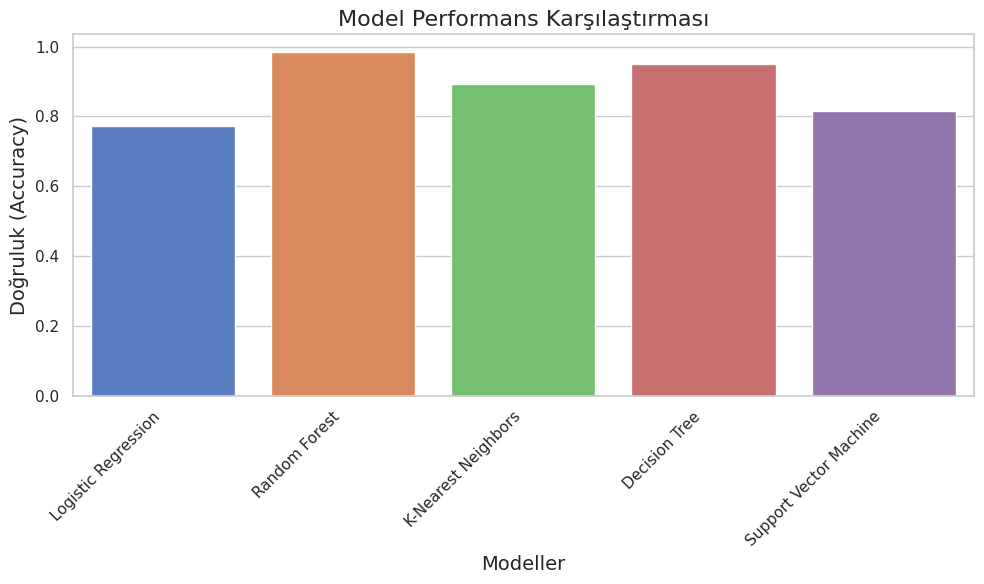

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Performans metriklerini saklamak için bir liste
results = []

# Modellerin performansını hesapla ve kaydet
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Modeli eğit
    y_pred = model.predict(X_test)  # Tahmin yap
    
    # Metrikleri hesapla
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Sonuçları kaydet
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Sonuçları DataFrame'e çevir
results_df = pd.DataFrame(results)

# Performans metriklerini görselleştir
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Accuracy ile basit bir barplot
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="muted")

# Grafik başlığı ve etiketler
plt.title("Model Performans Karşılaştırması", fontsize=16)
plt.ylabel("Doğruluk (Accuracy)", fontsize=14)
plt.xlabel("Modeller", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
